### Made by Liang Yihuai, 2019/12/02

In [1]:
import cv2
import os
import numpy as np
import pandas as pd
import sys
import time
from prof_dataset import ProfDataset

from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [4]:
data_path_train = 'images/Test2/Training images'
data_path_close_test = 'images/Test2/Close test'
data_path_open_test = 'images/Test2/Open test'

## get training data

In [5]:
x_train, y_train = ProfDataset(data_path_train).well_preprocessed_data()
x_test, y_test = ProfDataset(data_path_close_test).well_preprocessed_data()
x_test_open, y_test_open = ProfDataset(data_path_open_test).well_preprocessed_data()

In [6]:
print(x_train.shape)
print(x_test.shape)
print(x_test_open.shape)

(187, 16384)
(90, 16384)
(200, 16384)


In [10]:
y_train[:20]

array(['00740_941205', '00741_941201', '00743_941201', '00744_941201',
       '00745_941201', '00746_941201', '00747_941201', '00750_941201',
       '00751_941201', '00751_941205', '00752_941205', '00753_941201',
       '00754_941201', '00757_941201', '00758_941201', '00760_941201',
       '00761_941201', '00761_960530', '00762_941201', '00763_941201'],
      dtype='<U12')

In [9]:
y_test_open[:20]

array(['00003_941121', '00003_941121', '00029_940128', '00029_940128',
       '00140_941121', '00140_941121', '00146_941121', '00146_941121',
       '00157_940128', '00157_940128', '00185_940128', '00185_940128',
       '00191_940128', '00191_940128', '00192_940128', '00192_940128',
       '00194_940128', '00194_940128', '00195_940128', '00195_940128'],
      dtype='<U12')

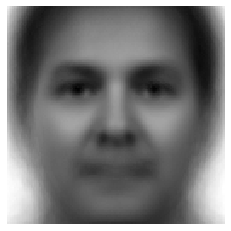

In [7]:
# get mean face
profData = ProfDataset(data_path_train)
before_mean_face = profData.get_data()[0]
meanFace = profData.mean_face(before_mean_face)
plt.imshow(meanFace.reshape(128, 128), cmap=plt.cm.gray)
plt.axis('off')
plt.show()

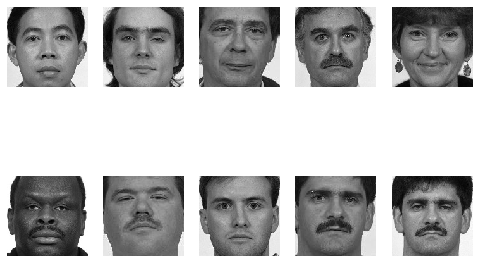

In [8]:
# display faces before minus mean faces.
for i in range(10):
    plt.subplot(2, 5, i+1) # row / col / index + 1
    plt.imshow(before_mean_face[i].reshape(128, 128), cmap=plt.cm.gray)
    plt.subplots_adjust(right=1.2, top=1.2)
    plt.axis('off')
plt.show()

In [7]:
# whether 'dataset' contains 'a_data'
def contains(dataset, a_data):
    for v in dataset:
        if v == a_data:
            return True;
    return False

In [8]:
NOBODY = '0'

# the people in the test data but not in the training set are 'nobody'.
# mark people who is nobody for test data
for i in range(len(y_test)):
    if not contains(y_train, y_test[i]):
        y_test[i] = NOBODY

for i in range(len(y_test_open)):
    if not contains(y_train, y_test_open[i]):
        y_test_open[i] = NOBODY


In [254]:
count = 0
for i in range(len(y_test)):
    if y_test[i] == NOBODY:
        count += 1
print((count / len(y_test) * 100), '% people in the close test set are NOBODY')

25.555555555555554 % people in the close test set are NOBODY


In [253]:
count = 0
for i in range(len(y_test_open)):
    if y_test_open[i] == NOBODY:
        count += 1
print((count / len(y_test_open)*100), '% people in the open test set are NOBODY')

100.0 % people in the open test set are NOBODY


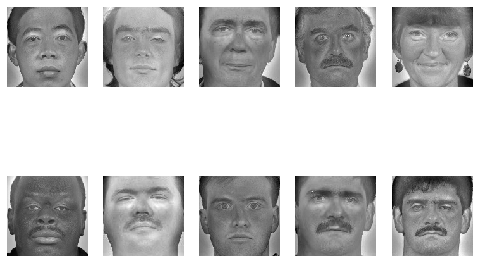

In [141]:
row_size = 128
col_size = 128

# train faces after minus mean face

for i in range(10):
    plt.subplot(2, 5, i+1) # row / col / index + 1
    plt.imshow(x_train[i].reshape(row_size, col_size), cmap=plt.cm.gray)
    plt.subplots_adjust(right=1.2, top=1.2)
    plt.axis('off')
plt.show()

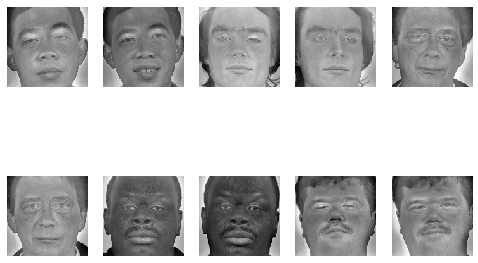

In [140]:
# test faces after minus mean face
for i in range(10):
    plt.subplot(2, 5, i+1) # row / col / index + 1
    plt.imshow(x_test[i].reshape((row_size, col_size)), cmap=plt.cm.gray)
    plt.subplots_adjust(right=1.2, top=1.2)
    plt.axis('off')
plt.show()

In [11]:
U,S,V = np.linalg.svd(x_train)
print(U.shape, S.shape, V.shape)

(187, 187) (187,) (16384, 16384)


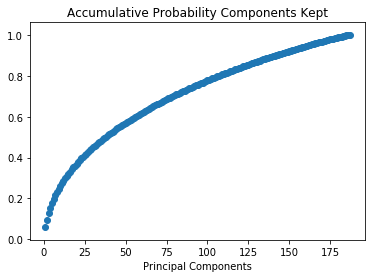

In [12]:
sum_eigenvalues = np.sum(S)
temp_sum = 0.0;
sum_arr = []
for i in range(len(S)):
    temp_sum += S[i]
    sum_arr.append(temp_sum/sum_eigenvalues);

plt.title('Accumulative Probability Components Kept')
plt.xlabel('Principal Components')
plt.scatter(range(1, len(sum_arr)+1), sum_arr)
plt.show()

In [150]:
component_n = 50
components = V
x_train_newspace = U[:, :component_n]

def tranform(X):
    new_components = components[: component_n]
    return np.dot(X, new_components.T)

def inverse_transform(X):
    if np.ndim(X) == 1:
        feature_num = np.shape(X)[0]
    else:
        feature_num = np.shape(X)[1]
    return np.dot(X, components[: feature_num])

In [151]:
x_test_newspace = tranform(x_test)
x_test_open_newspace = tranform(x_test_open)

In [152]:
print(x_train_newspace.shape, x_test_newspace.shape, x_test_open_newspace.shape)

(187, 50) (90, 50) (200, 50)


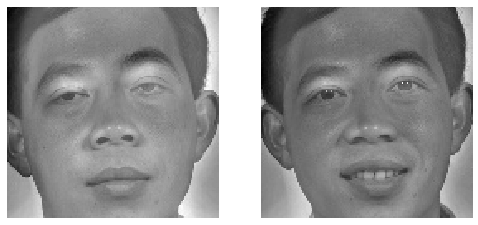

In [163]:
for i in range(2):
    plt.subplot(1, 2, i+1) 
    plt.imshow(np.reshape(x_test[i], (row_size, col_size)), cmap=plt.cm.gray)
    plt.subplots_adjust(right=1.2, top=1.2)
    plt.axis('off')
plt.show()

compenent num is:  187 , keep  100.0 % info.


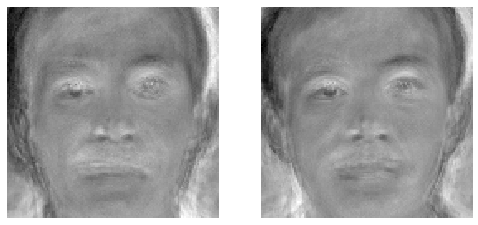

compenent num is:  160 , keep  94.58512671331512 % info.


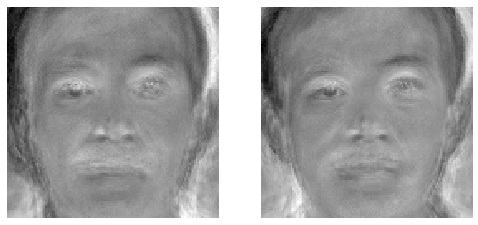

compenent num is:  120 , keep  84.0876269252576 % info.


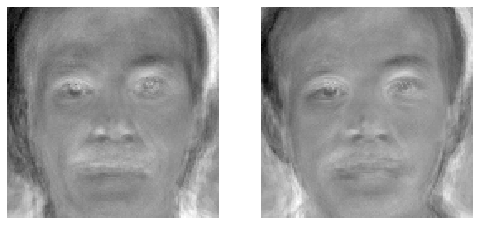

compenent num is:  80 , keep  70.56079107778149 % info.


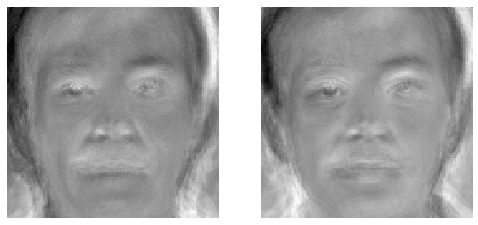

compenent num is:  50 , keep  57.061404934136505 % info.


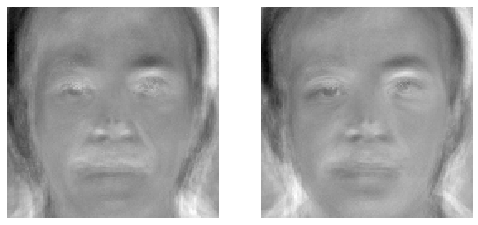

compenent num is:  40 , keep  51.46506494381116 % info.


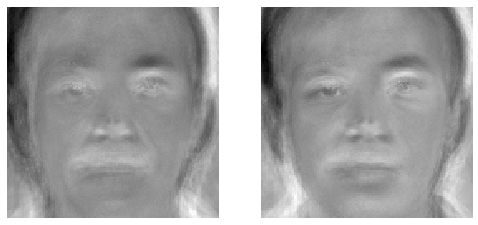

compenent num is:  30 , keep  44.9584954805878 % info.


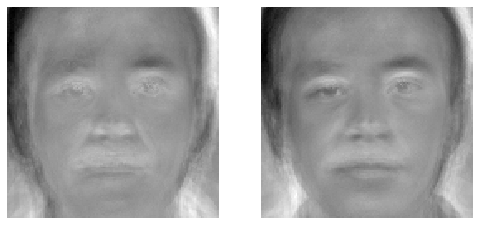

compenent num is:  25 , keep  41.20398438792095 % info.


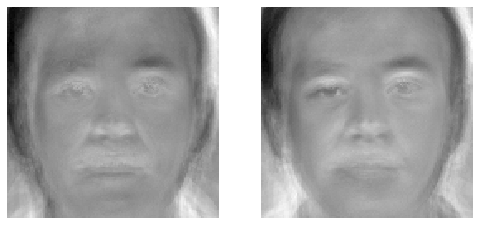

compenent num is:  20 , keep  37.02092389587025 % info.


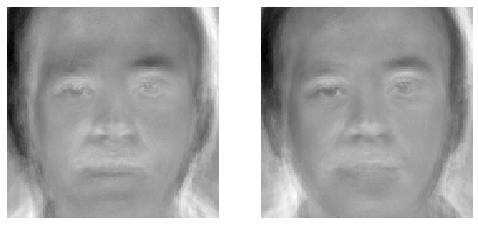

compenent num is:  15 , keep  32.168557743983236 % info.


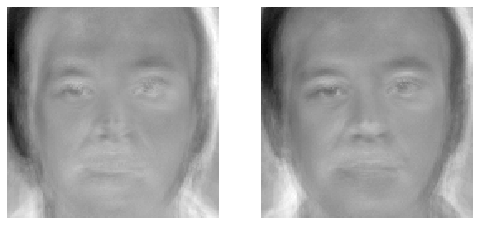

compenent num is:  12 , keep  28.770879625066435 % info.


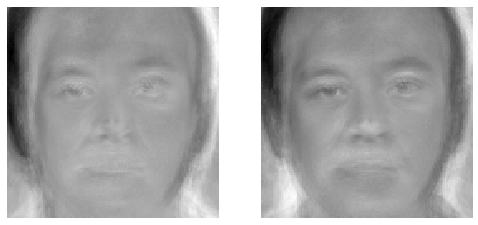

compenent num is:  10 , keep  26.248734655532836 % info.


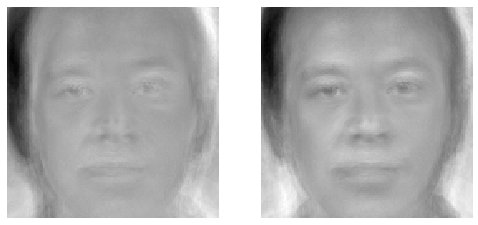

compenent num is:  8 , keep  23.324049028883493 % info.


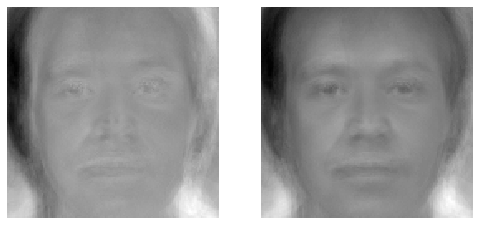

compenent num is:  6 , keep  19.88739725942773 % info.


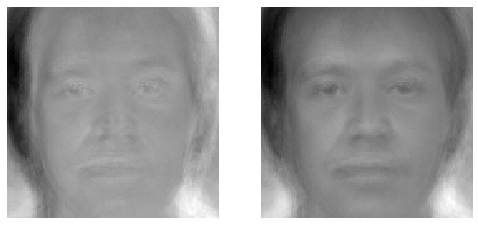

compenent num is:  4 , keep  15.506037790815094 % info.


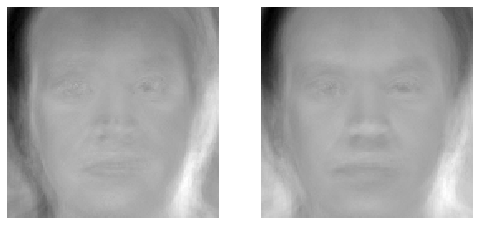

compenent num is:  3 , keep  12.828582772241692 % info.


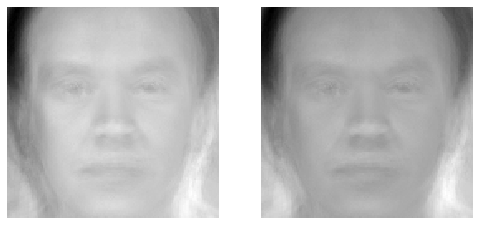

compenent num is:  2 , keep  9.488984968707054 % info.


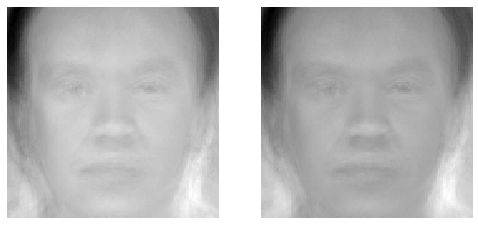

compenent num is:  1 , keep  5.986447255702221 % info.


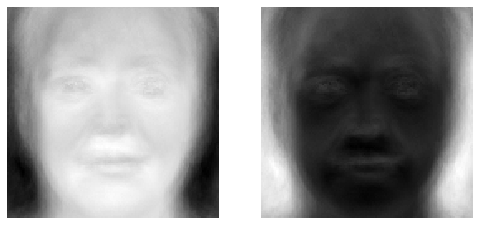

In [162]:
component_num_arr = [187, 160, 120, 80, 50, 40, 30, 25, 20, 15, 12, 10, 8, 6, 4, 3, 2, 1]
for num in component_num_arr:
    component_n = num;
    x_transformed = tranform(x_test[:2])
    x_test_inversed = inverse_transform(x_transformed)
    
    sum_component = 0;
    for i in range(0, num):
        sum_component += S[i] 
    
    sum_all_component = np.sum(S)
    
    print("compenent num is: ", num, ", keep ",  (sum_component/sum_all_component) * 100 ,"% info.")
    for i in range(2):
        plt.subplot(1, 2, i+1) 
        plt.imshow(np.reshape(x_test_inversed[i], (row_size, col_size)), cmap=plt.cm.gray)
        plt.subplots_adjust(right=1.2, top=1.2)
        plt.axis('off')
    plt.show()


In [109]:
from sklearn.decomposition import PCA

In [121]:
pca = PCA(whiten=True, n_components=50)
x_train_new = pca.fit_transform(x_train)
x_test_new = pca.transform(x_test)


In [122]:
x_train_new.shape

(187, 50)

In [123]:
x_test_new.shape

(90, 50)

In [124]:
# norm L2 distance
def distance(arr1, arr2):
    sub = np.subtract(arr1, arr2)
    return np.sqrt(np.dot(sub, sub)) / len(arr1)

In [125]:

def predict(x_train_, x_test_, thres = sys.maxsize):
    result = []
    for i in range(len(x_test_)):
        min_dist = sys.maxsize
        prediction = -1;
        for k in range(len(x_train_)):
            dist = distance(x_test_[i], x_train_[k])
            if dist < min_dist:
                prediction = k
                min_dist = dist
        
        if min_dist > thres:
            result.append(NOBODY)
        else:
            result.append(y_train[prediction])
    return result

In [126]:
def get_max_correct_dist(x_train_, x_test_, y_test_):
    max_correct_dist = 0
    for i in range(len(x_test_)):
        min_dist = sys.maxsize
        prediction = -1;
        for k in range(len(x_train_)):
            dist = distance(x_test_[i], x_train_[k])
            if dist < min_dist:
                prediction = k
                min_dist = dist
        
        
        if y_train[prediction] == y_test_[i]:
            if dist > max_correct_dist:
                max_correct_dist = dist
    
    return max_correct_dist

In [127]:
def acc(preds, y_test_):
    return np.mean(preds==y_test_)

In [128]:
result = predict(x_train_new, x_test_new)
acc(result, y_test)

0.5111111111111111

In [129]:
get_max_correct_dist(x_train_new, x_test_new, y_test)

0.29141849198161734

In [136]:
ran_arr = np.random.rand(100)
best_thres = 0
max_acc = 0

thres_history = []
acc_history = []

for thres in np.sort(ran_arr):
    result = predict(x_train_new, x_test_new, thres)
    accuracy = acc(result, y_test)
    
    thres_history.append(thres)
    acc_history.append(accuracy)
    
    if accuracy > max_acc:
        max_acc = accuracy
        best_thres = thres
    
print(best_thres, max_acc)

0.088289708703859 0.7


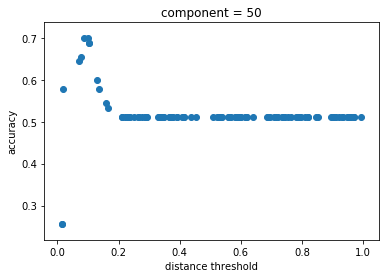

In [137]:
plt.title("component = 50")
plt.ylabel('accuracy')
plt.xlabel('distance threshold')
plt.scatter(thres_history, acc_history)
plt.show()

0.0027729069644010893 0.24444444444444444


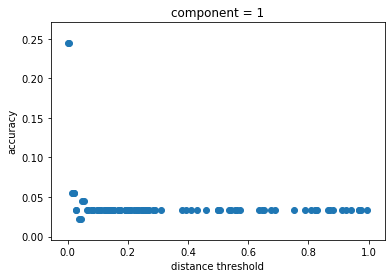

0.00170102920635099 0.25555555555555554


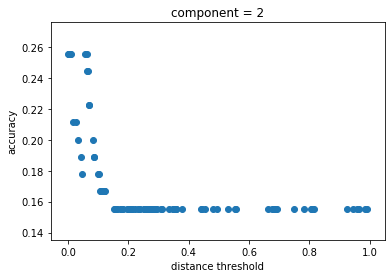

0.04989564242104516 0.5222222222222223


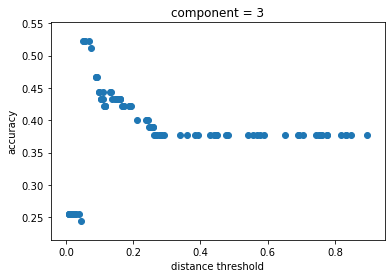

0.059597565434921895 0.5777777777777777


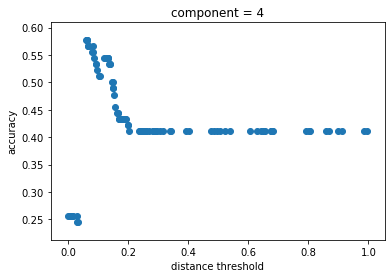

0.10001666093998662 0.6111111111111112


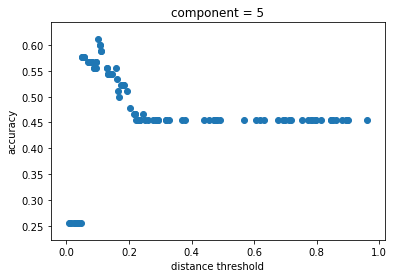

0.11111043822344142 0.6777777777777778


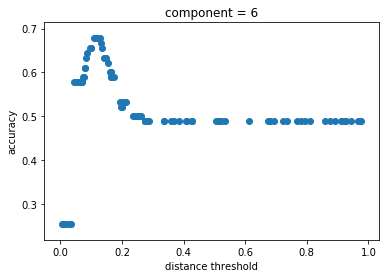

0.121357581528447 0.6777777777777778


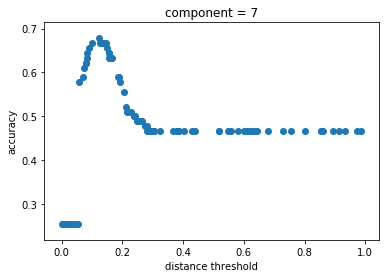

0.11258606511907436 0.6888888888888889


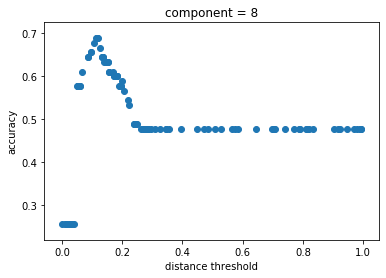

0.10638548714845465 0.6666666666666666


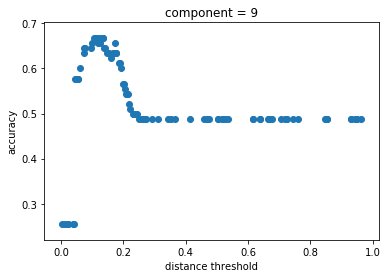

0.11692638807587274 0.6777777777777778


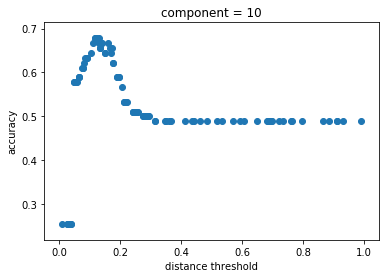

0.11554447828784331 0.6888888888888889


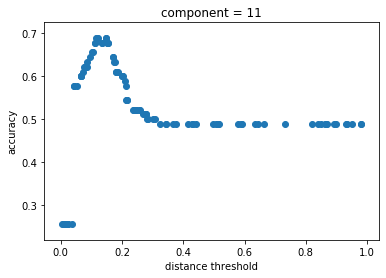

0.11484411138747508 0.6888888888888889


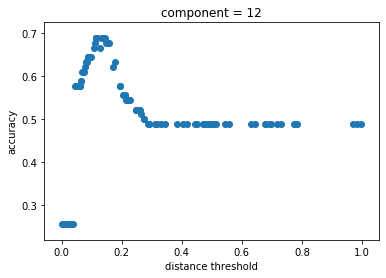

0.1361524144419372 0.6888888888888889


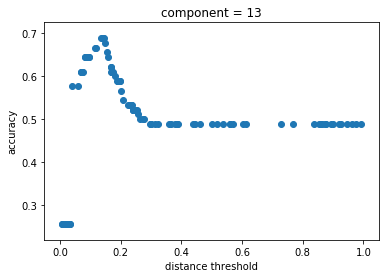

0.11895505414859915 0.6888888888888889


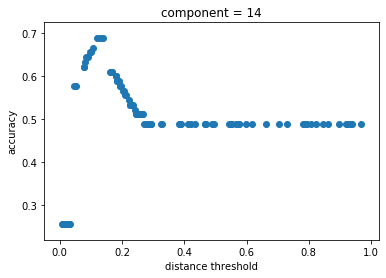

0.12496092937651573 0.7


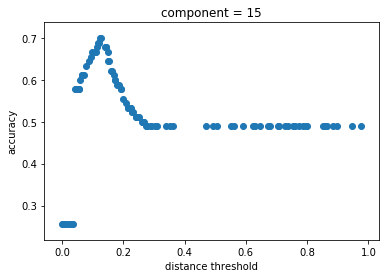

0.12481872132230717 0.6888888888888889


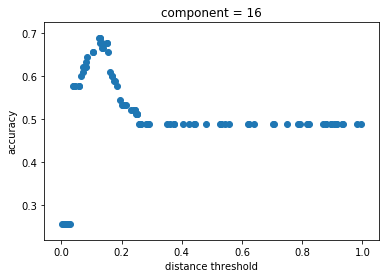

0.12125821391779626 0.7


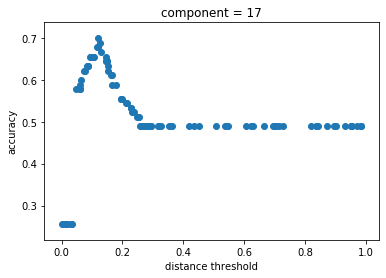

0.1262838649132557 0.6888888888888889


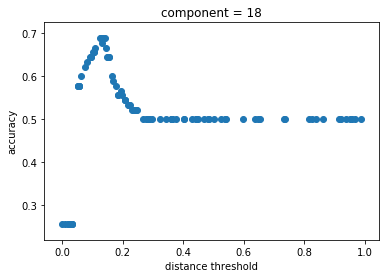

0.1298961132034634 0.7


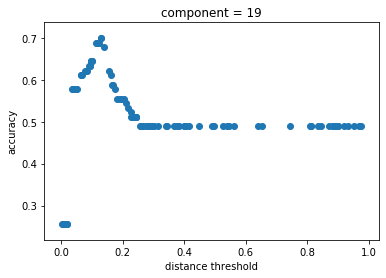

0.12261085850689002 0.7


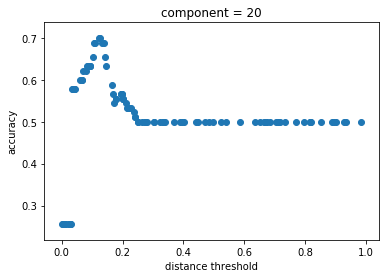

0.11647701579113418 0.7


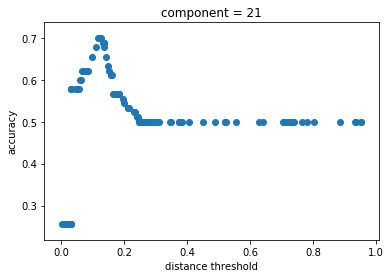

0.11790669006833535 0.7


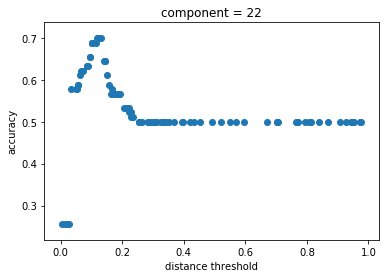

0.12820844305996815 0.7


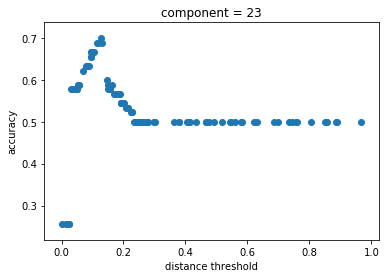

0.10709666074814528 0.6888888888888889


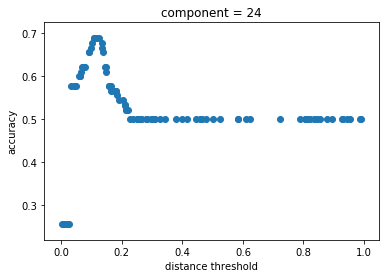

0.11328184209699925 0.7


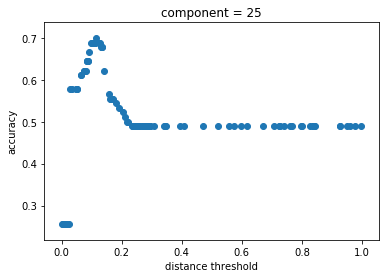

0.12026092644697295 0.7111111111111111


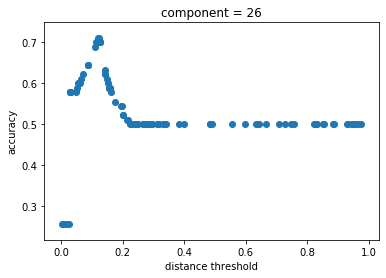

0.12507077997488392 0.7111111111111111


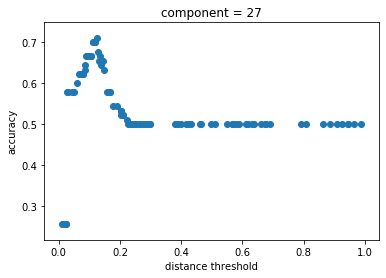

0.12242871651212216 0.7111111111111111


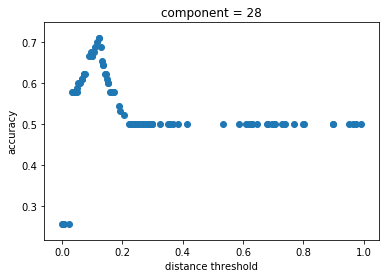

0.10920959004517977 0.7


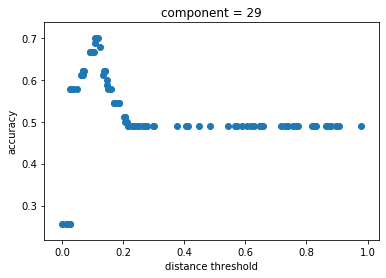

0.10965298636386356 0.7


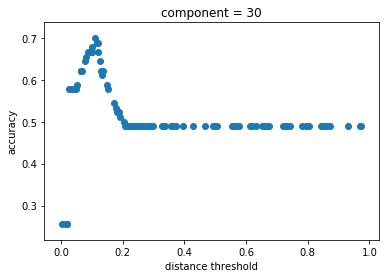

0.10833457127560617 0.7


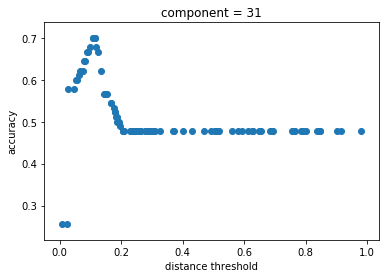

0.10873777745644397 0.7111111111111111


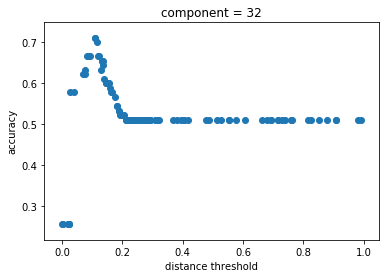

0.10926302215503711 0.7111111111111111


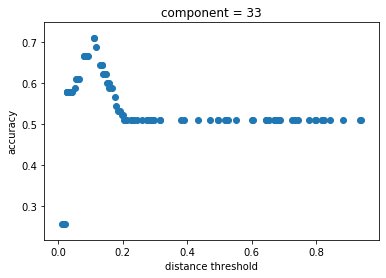

0.10846512560914656 0.7111111111111111


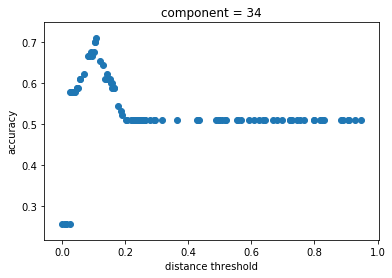

0.10088649265397404 0.6777777777777778


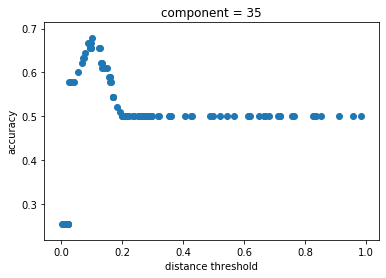

0.10649169064186416 0.7111111111111111


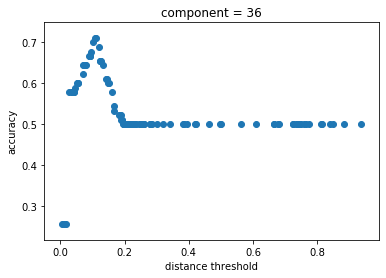

0.10038605938363715 0.7


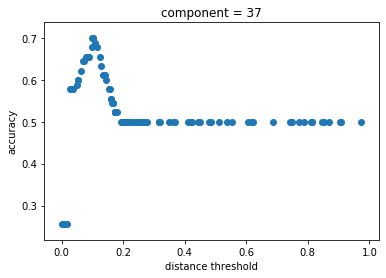

0.10703020620501183 0.7


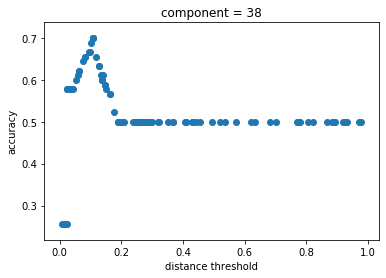

0.09837714871741489 0.7111111111111111


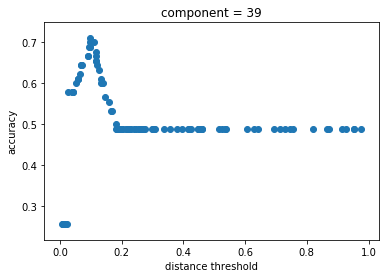

0.11423274994590632 0.7


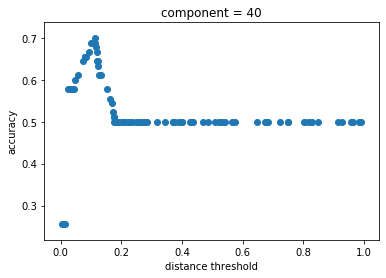

0.1019420510547528 0.7111111111111111


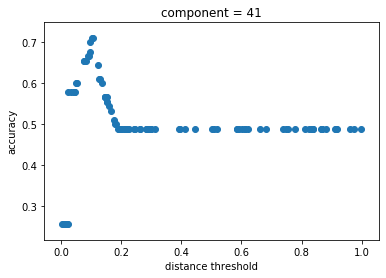

0.10979616422689135 0.7111111111111111


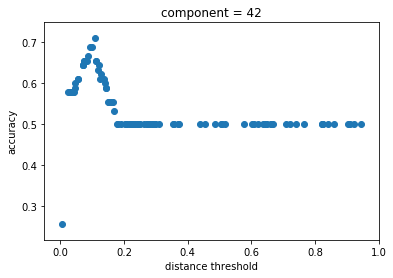

0.11116135864809495 0.6888888888888889


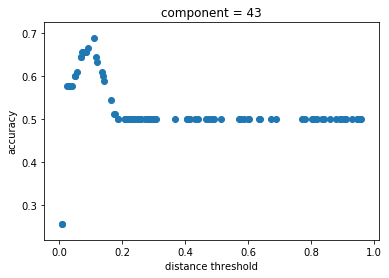

0.11024511411960235 0.6888888888888889


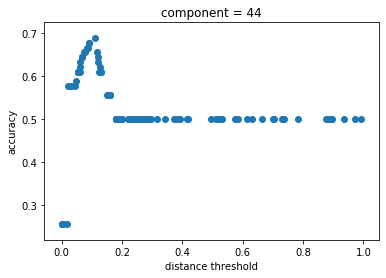

0.1026919574073591 0.7222222222222222


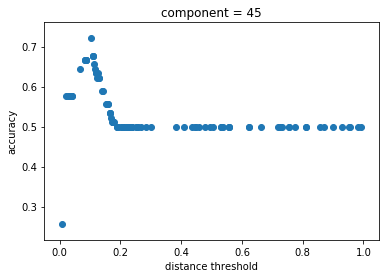

0.10470609723703916 0.7111111111111111


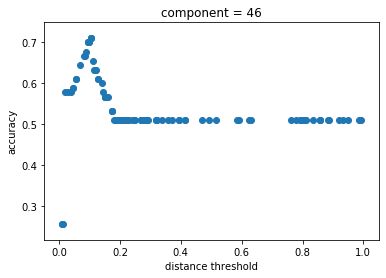

0.10175981779560014 0.7222222222222222


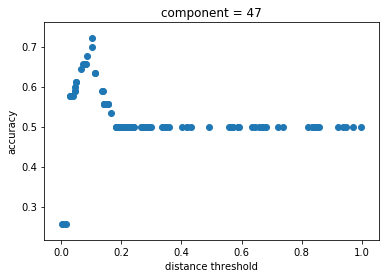

0.10097132197051861 0.7111111111111111


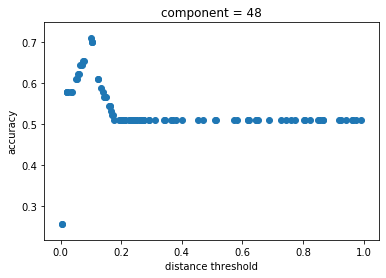

0.09436913328363006 0.7111111111111111


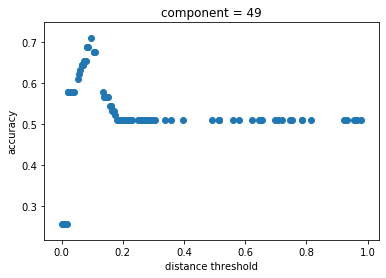

0.10380375524211435 0.7222222222222222


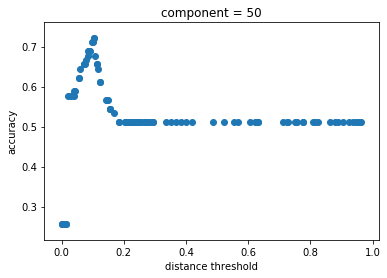

0.09482428527131251 0.7111111111111111


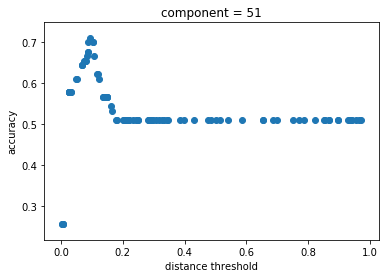

0.08812431064767257 0.7111111111111111


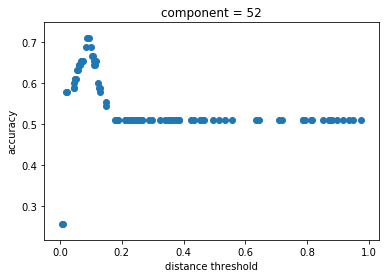

0.09921392678114754 0.7222222222222222


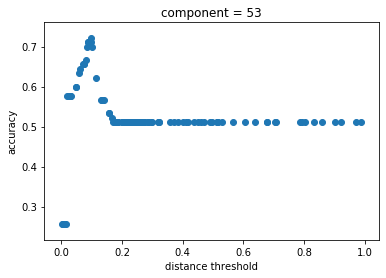

0.08802239484047193 0.7111111111111111


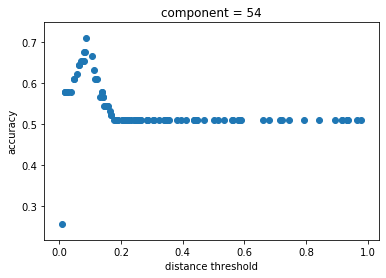

0.09940628193849532 0.6777777777777778


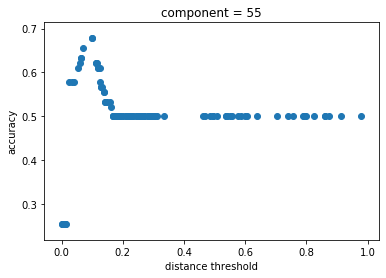

0.09220785648197823 0.7111111111111111


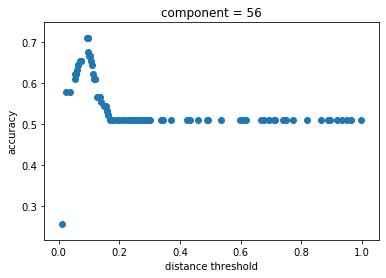

0.09082248719175097 0.7111111111111111


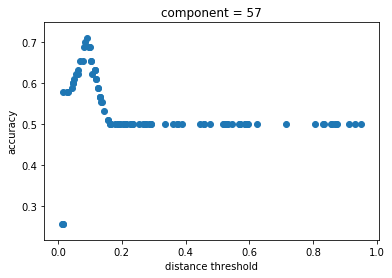

0.08734834354132158 0.7111111111111111


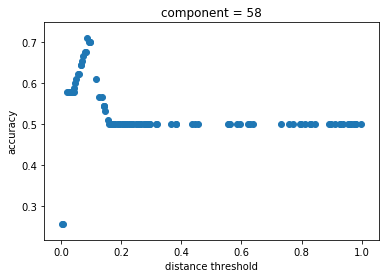

0.0848378275190137 0.7111111111111111


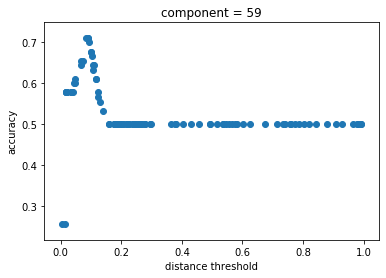

0.08593386394025235 0.7111111111111111


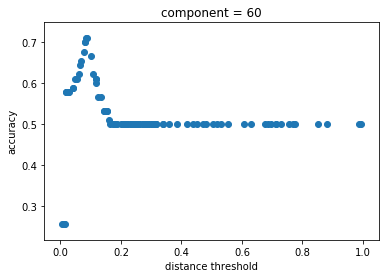

0.08091285945974333 0.7


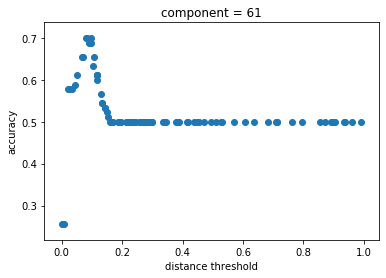

0.08569985542831793 0.7111111111111111


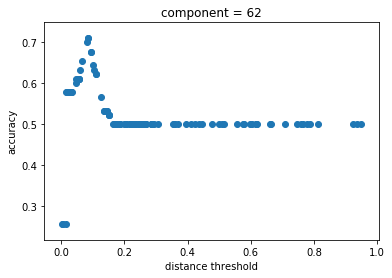

0.09465440583931095 0.6888888888888889


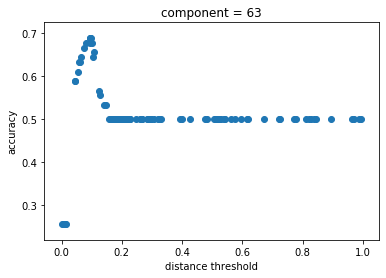

0.08371393431923398 0.7


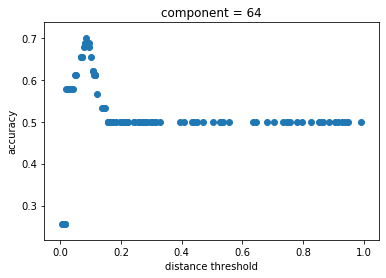

0.08315147265708997 0.7111111111111111


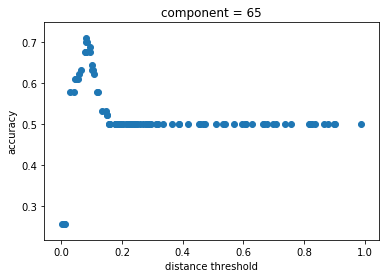

0.08137022437586472 0.7111111111111111


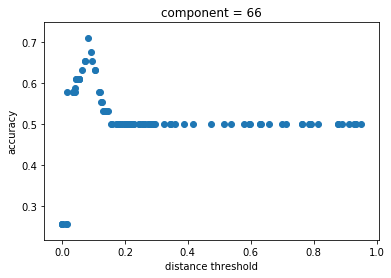

0.07929079728222643 0.6777777777777778


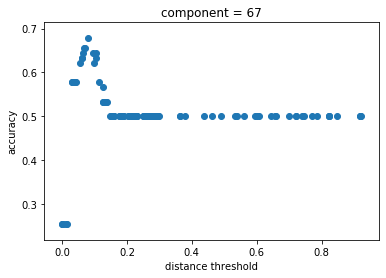

0.07843388440946608 0.6888888888888889


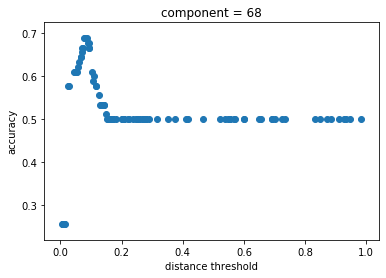

0.081678038971019 0.7


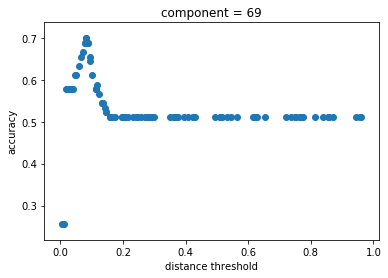

0.08168762568813188 0.7


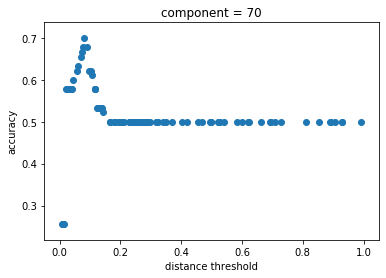

0.08359820933080743 0.7111111111111111


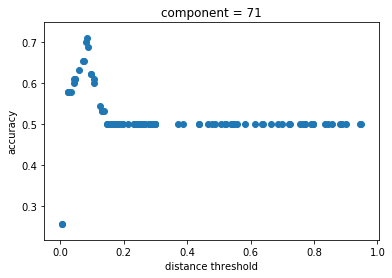

0.08242067471607865 0.7111111111111111


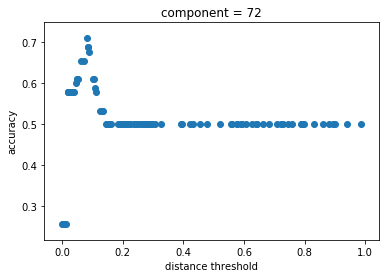

0.08430147578710301 0.7


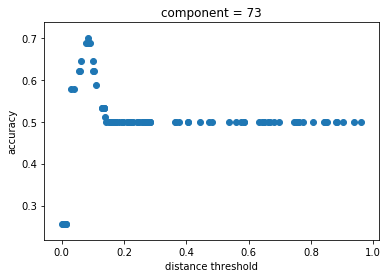

0.07994282989567335 0.7111111111111111


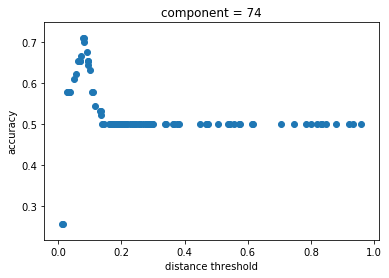

0.07520475213127563 0.6777777777777778


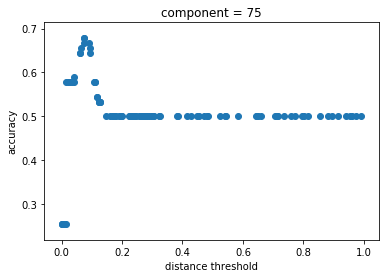

0.07758306565802475 0.6888888888888889


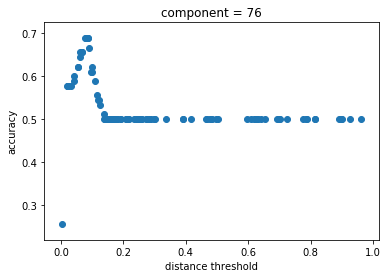

0.07714421244548549 0.7


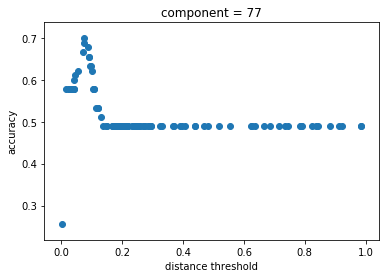

0.07649828857111515 0.6888888888888889


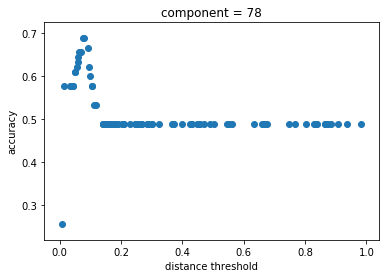

0.07786306406927845 0.7


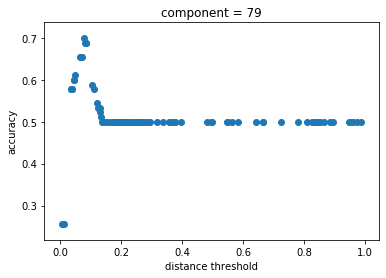

0.07546052785807379 0.6888888888888889


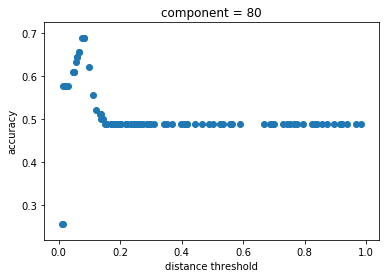

0.07906202958075155 0.7


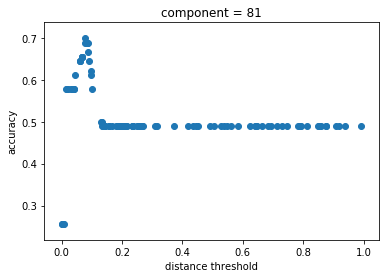

0.0752938966562154 0.6888888888888889


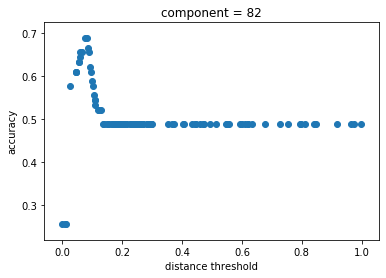

0.07305162723131717 0.6777777777777778


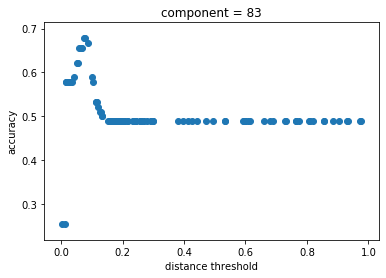

0.07745089659617199 0.7


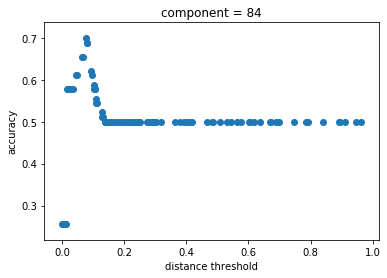

0.07673207612279045 0.7


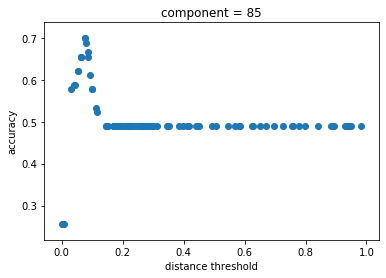

0.0816953049936419 0.6777777777777778


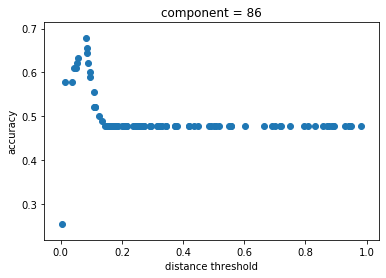

0.07829673744957732 0.6888888888888889


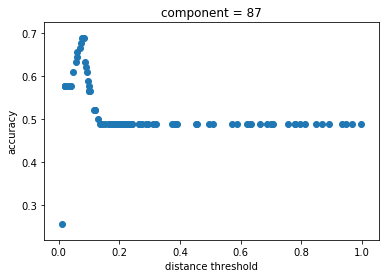

0.07612851146307886 0.7


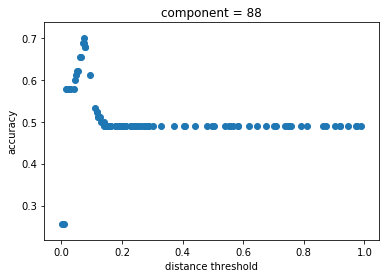

0.0754388632916211 0.6666666666666666


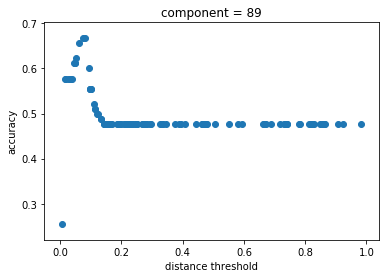

0.0632142841026882 0.6555555555555556


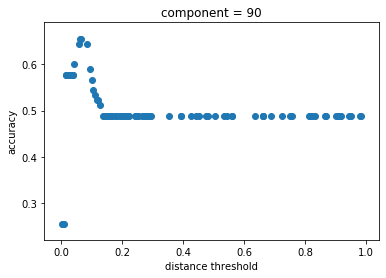

0.07541647536792664 0.6777777777777778


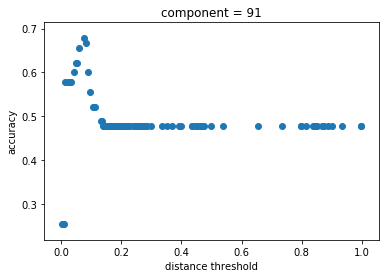

0.07212286123517014 0.6777777777777778


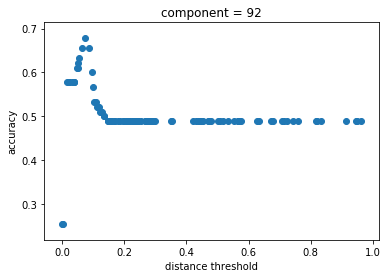

0.07989025264924121 0.6888888888888889


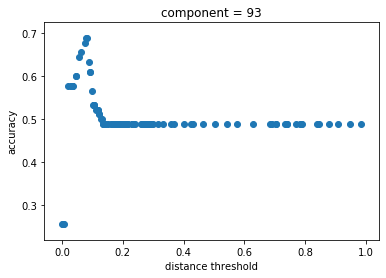

0.06587167608779612 0.6666666666666666


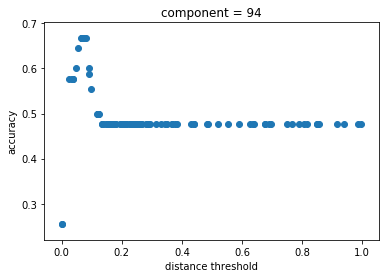

0.07922575285188689 0.6888888888888889


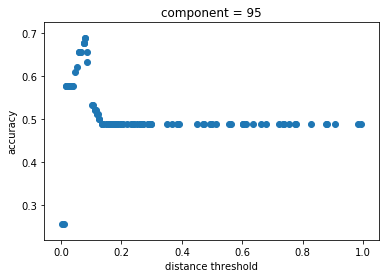

0.07907784641958165 0.6777777777777778


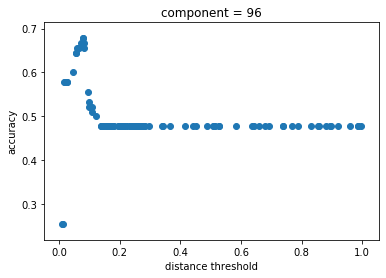

0.07734246370213212 0.6777777777777778


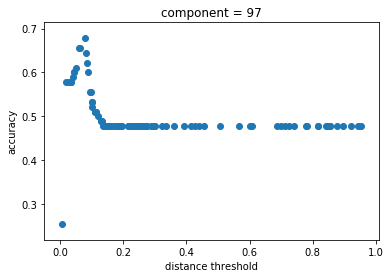

0.07499390177117751 0.6777777777777778


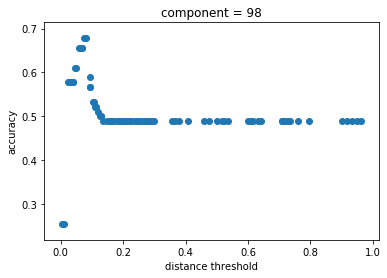

0.0689494017265988 0.6666666666666666


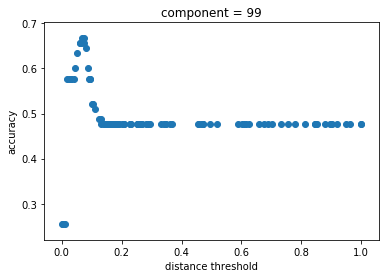

0.07029148055670026 0.6666666666666666


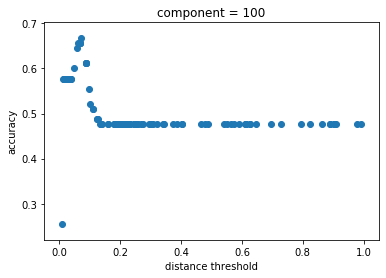

0.07435822327435082 0.6777777777777778


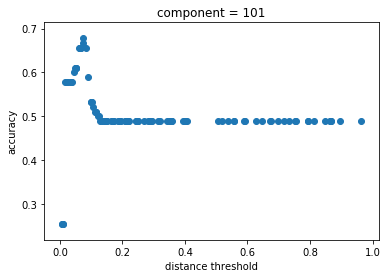

0.07773591101477655 0.6777777777777778


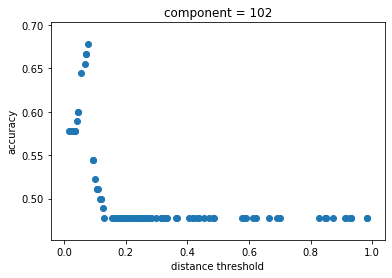

0.07449320261793335 0.6777777777777778


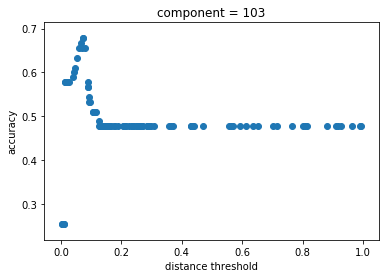

0.07499432085502221 0.6888888888888889


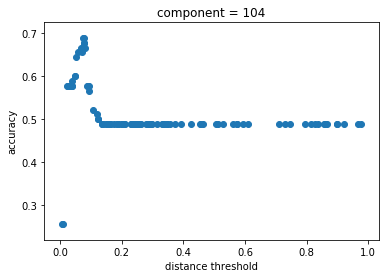

0.07443551685349156 0.6777777777777778


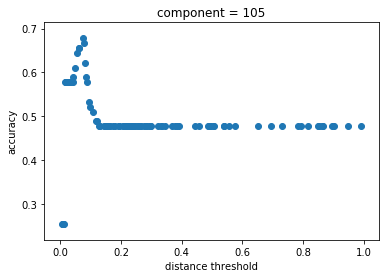

0.07035316802550162 0.6666666666666666


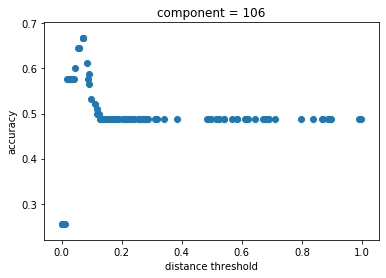

0.0753737117086265 0.6777777777777778


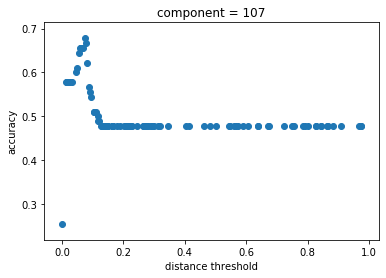

0.07348995598512618 0.6777777777777778


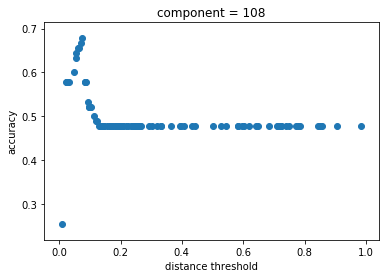

0.0763168915675274 0.6666666666666666


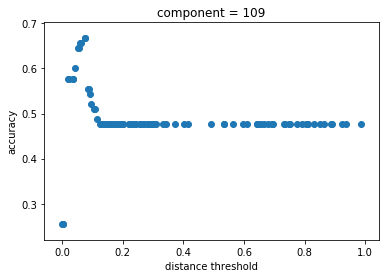

0.07239691712505059 0.6888888888888889


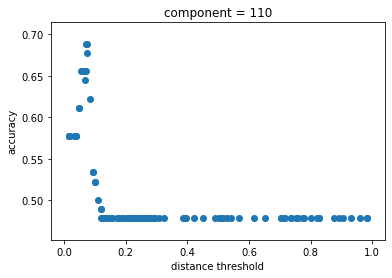

0.07525597225635373 0.6777777777777778


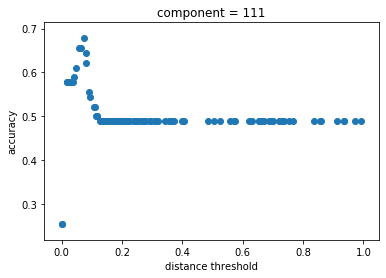

0.07685038921125688 0.6666666666666666


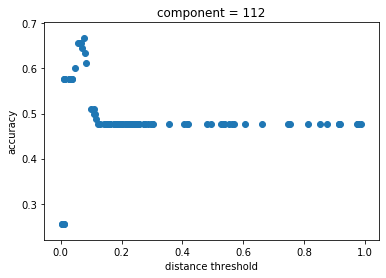

0.05704083370999724 0.6555555555555556


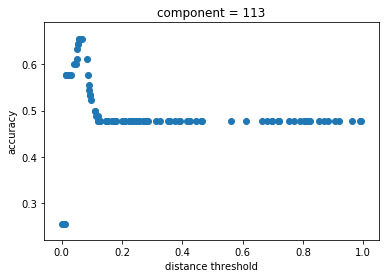

0.06146411890002812 0.6555555555555556


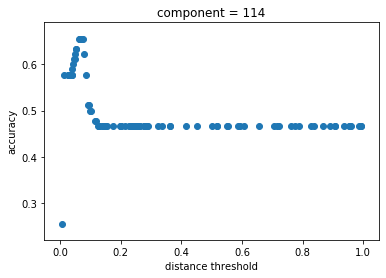

0.07053520620914755 0.6666666666666666


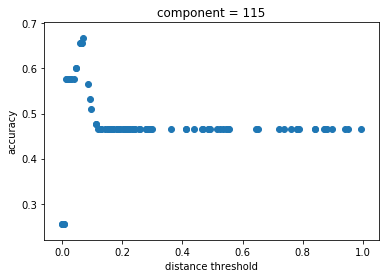

0.0737630235038107 0.6666666666666666


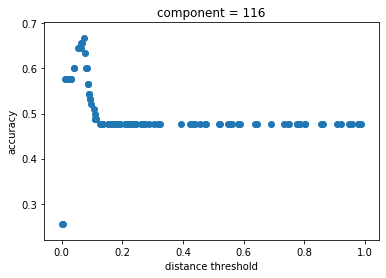

0.07970041510171977 0.6111111111111112


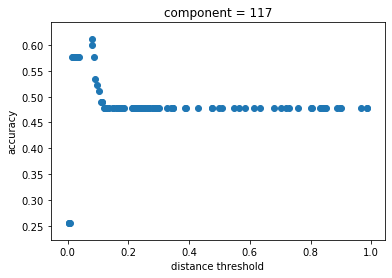

0.07027140168879059 0.6666666666666666


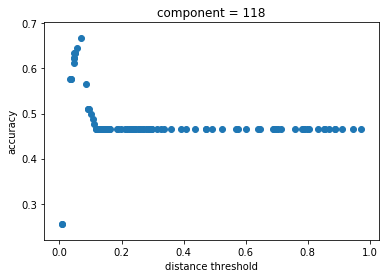

0.05726034635205968 0.6555555555555556


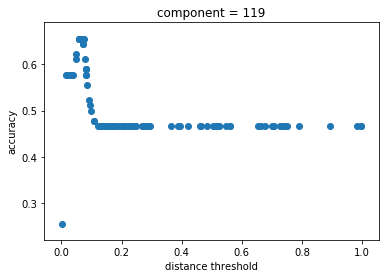

0.070065587226611 0.6777777777777778


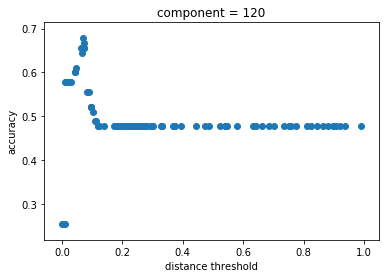

0.05642402569724492 0.6555555555555556


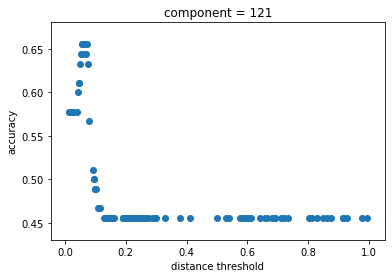

0.07022388861198726 0.6666666666666666


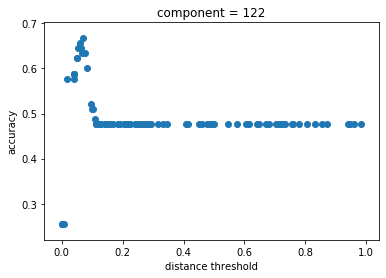

0.05978883491570364 0.6555555555555556


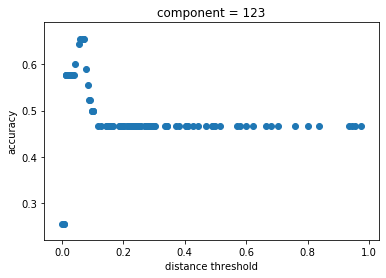

0.05474742680348932 0.6555555555555556


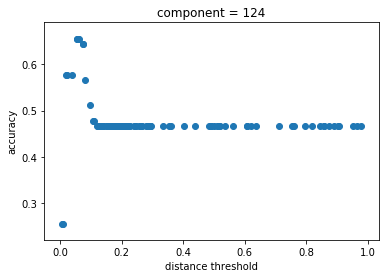

0.06936654536482699 0.6777777777777778


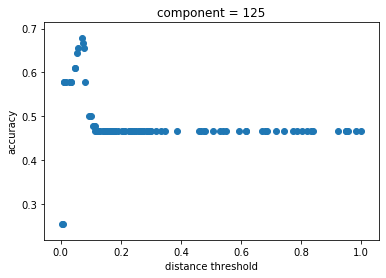

0.06668347113591182 0.6666666666666666


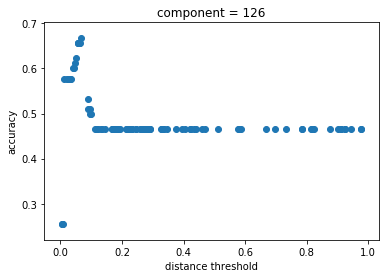

0.07397708897291673 0.6666666666666666


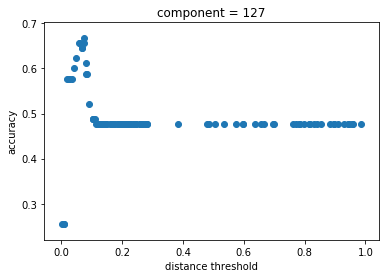

0.056923950370143195 0.6555555555555556


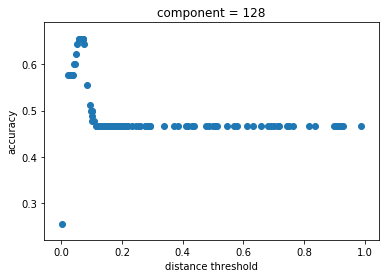

0.059037410019212144 0.6555555555555556


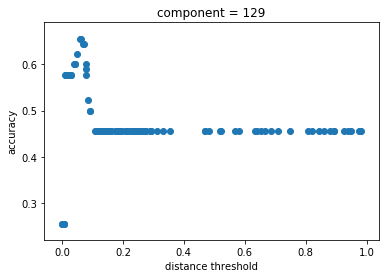

0.05914446948419369 0.6555555555555556


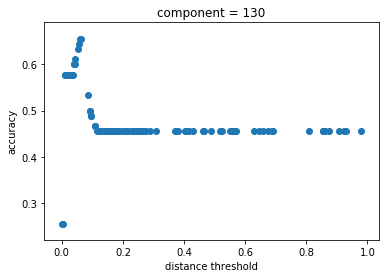

0.0544764644865009 0.6555555555555556


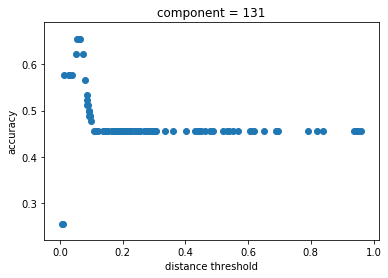

0.05347166246098901 0.6555555555555556


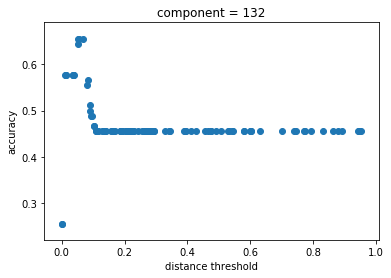

0.059041651879796375 0.6555555555555556


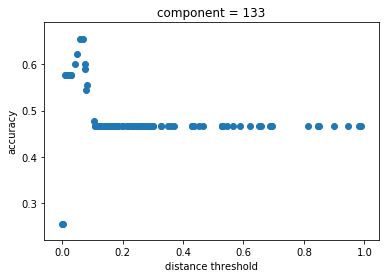

0.06669800763087175 0.6555555555555556


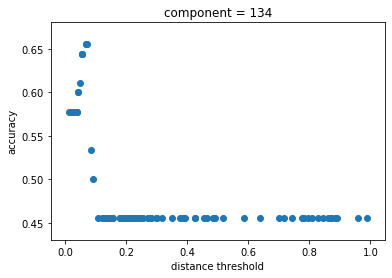

0.05611045391406211 0.6555555555555556


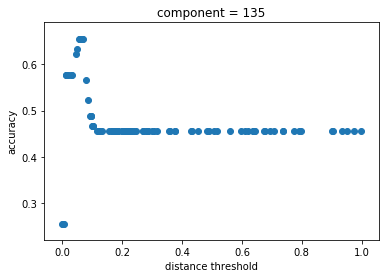

0.06733385422006405 0.6555555555555556


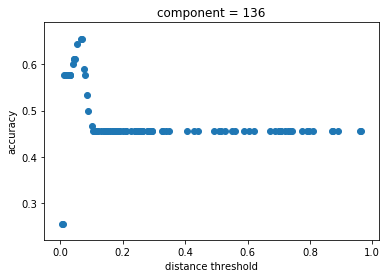

0.06349422344991529 0.6666666666666666


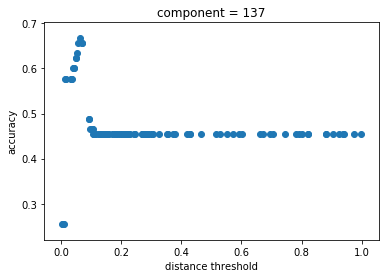

0.06448907082612831 0.6666666666666666


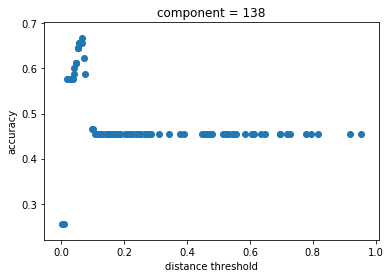

0.06505741856921039 0.6777777777777778


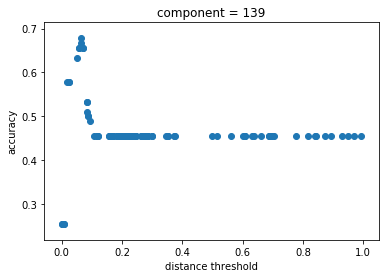

0.05425684047949053 0.6555555555555556


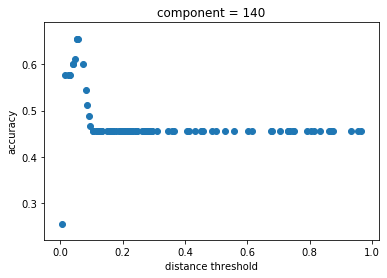

0.0558967810608187 0.6555555555555556


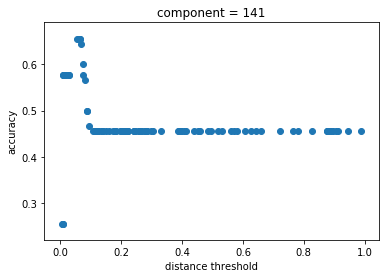

0.056340851987194684 0.6555555555555556


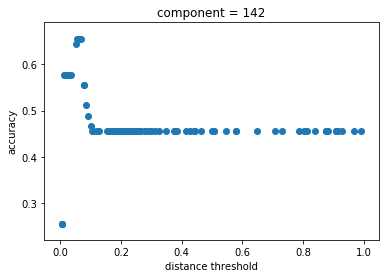

0.0558759739160219 0.6555555555555556


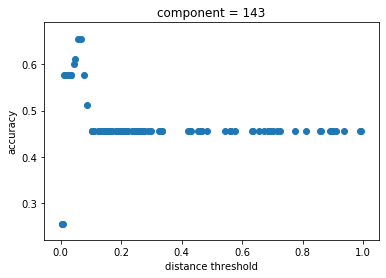

0.06153096213120522 0.6555555555555556


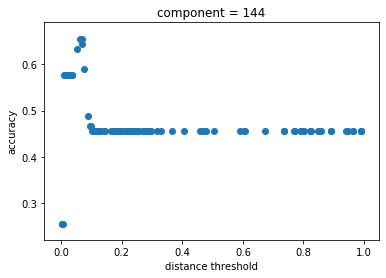

0.056124845392845034 0.6555555555555556


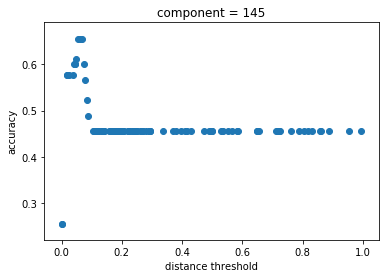

0.05485467570975489 0.6555555555555556


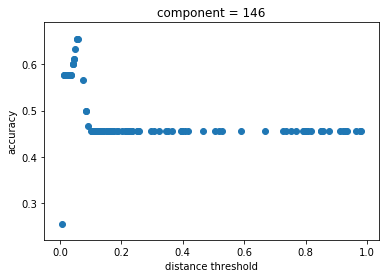

0.053372282863755546 0.6555555555555556


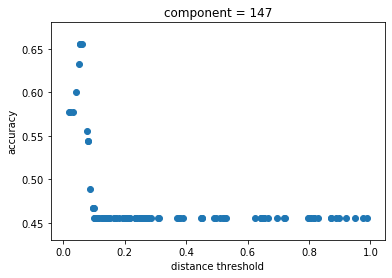

0.06341839402267857 0.6666666666666666


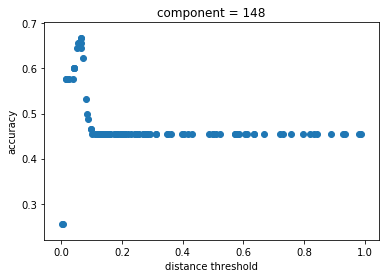

0.06329695758612448 0.6666666666666666


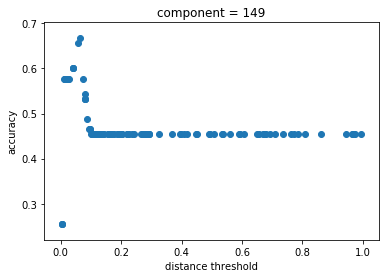

0.06097736160201575 0.6555555555555556


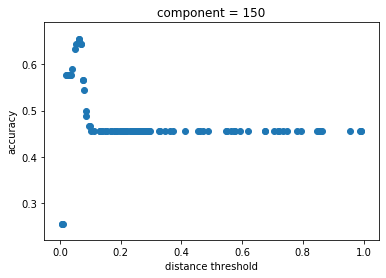

0.05458275935983148 0.6555555555555556


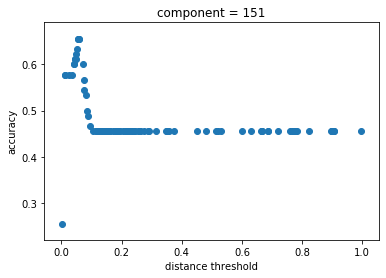

0.06546493387088949 0.6666666666666666


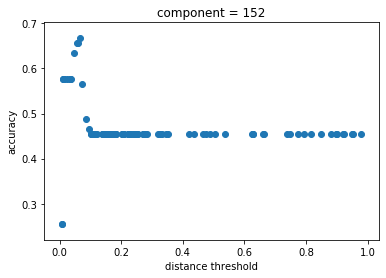

0.05653487455384973 0.6555555555555556


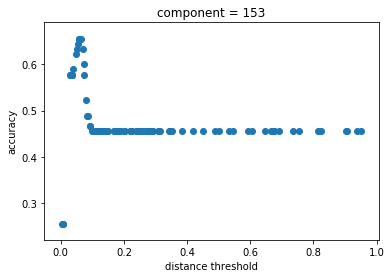

0.05669060505655814 0.6555555555555556


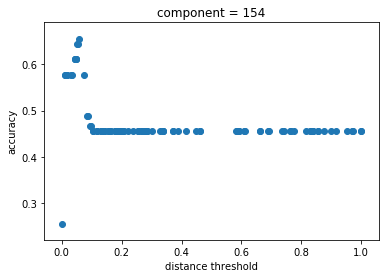

0.05445301809721718 0.6555555555555556


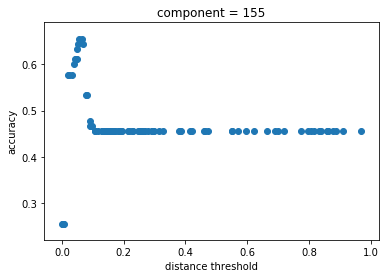

0.05477337173243195 0.6555555555555556


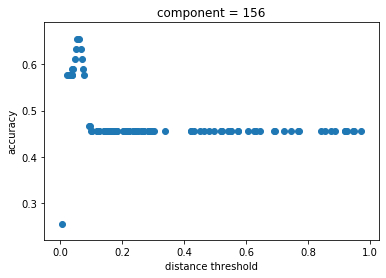

0.05393199653145142 0.6555555555555556


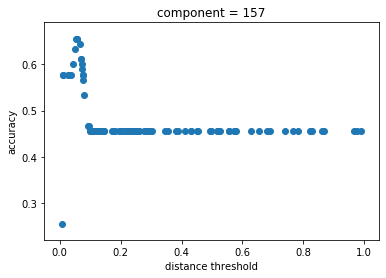

0.06365770402170406 0.6666666666666666


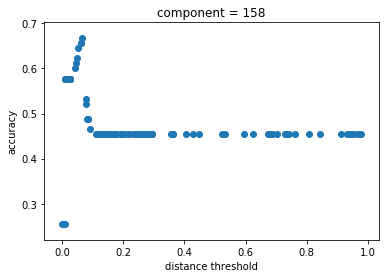

0.05741369352396508 0.6555555555555556


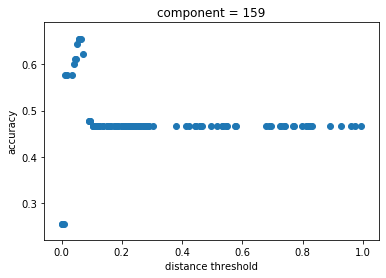

0.053212367521490785 0.6555555555555556


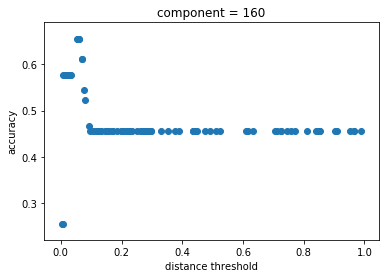

0.06450213023811613 0.6666666666666666


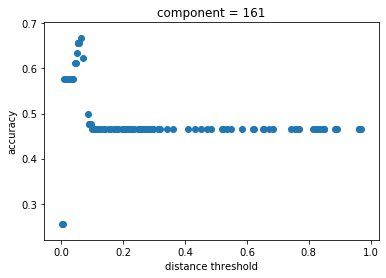

0.05262139681100673 0.6555555555555556


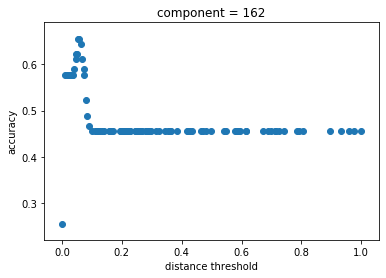

0.05664087022721831 0.6555555555555556


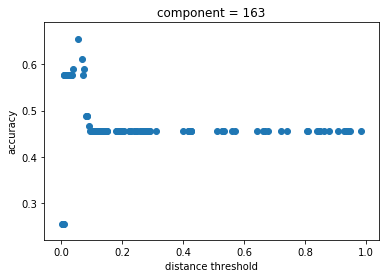

0.05896432845351007 0.6666666666666666


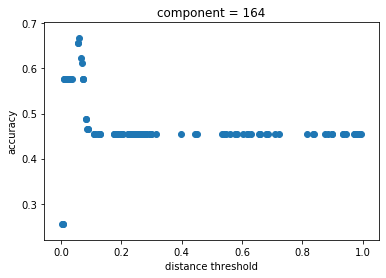

0.05526005530945492 0.6555555555555556


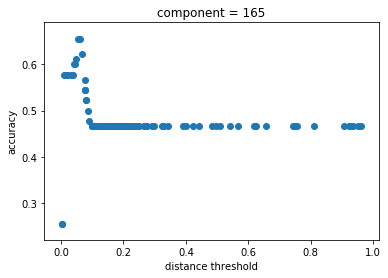

0.04889415170471762 0.6333333333333333


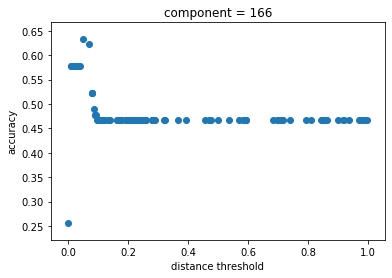

0.05500746728334105 0.6555555555555556


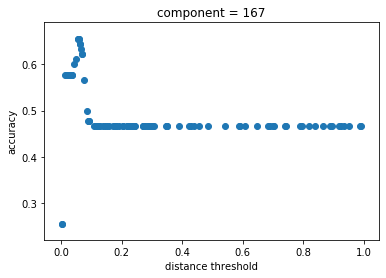

0.053545648701167736 0.6555555555555556


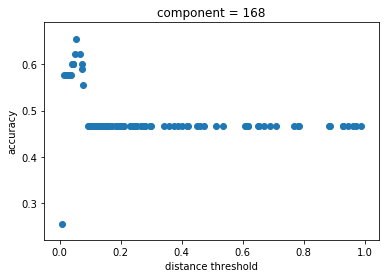

0.06497594717083954 0.6333333333333333


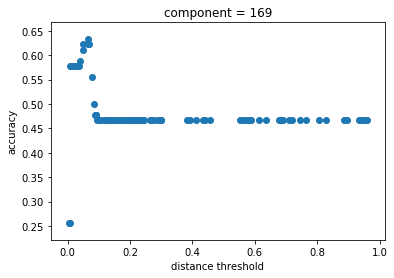

0.05528894598282567 0.6555555555555556


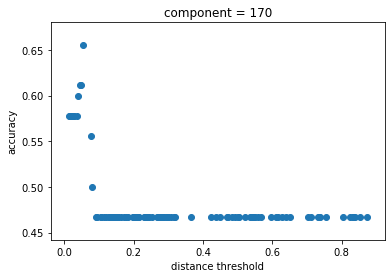

0.06861748878456893 0.6222222222222222


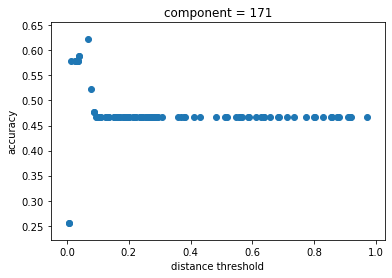

0.055176553307455974 0.6555555555555556


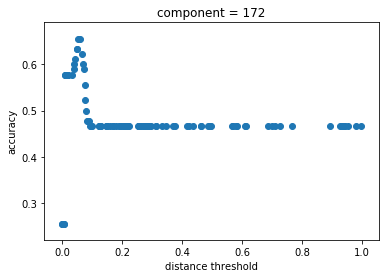

0.05927615320795203 0.6666666666666666


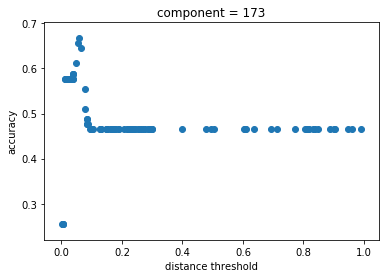

0.0538661140398883 0.6555555555555556


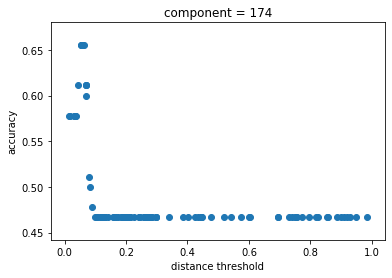

0.05492445463494949 0.6555555555555556


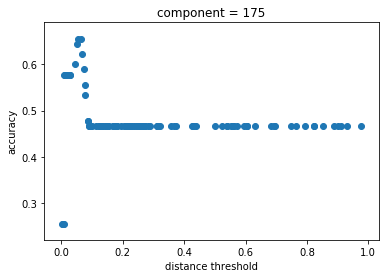

0.05775621053884633 0.6666666666666666


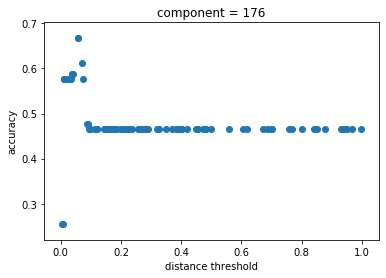

0.06267570739229227 0.6555555555555556


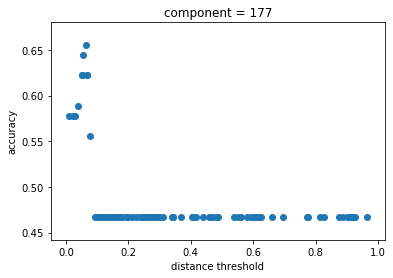

0.05757481259662127 0.6666666666666666


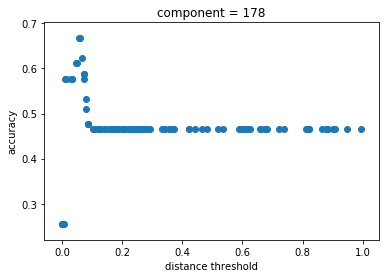

0.05884298030486987 0.6666666666666666


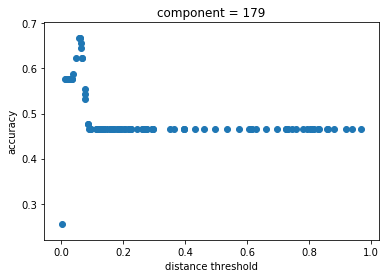

0.056901999152921795 0.6555555555555556


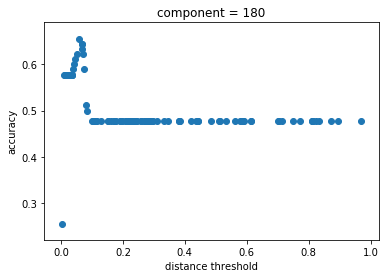

0.063513252268181 0.6777777777777778


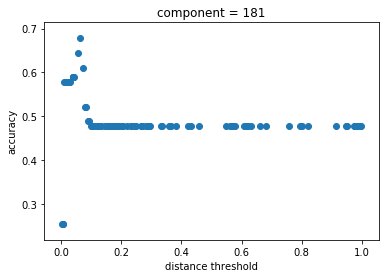

0.060887179411037384 0.6777777777777778


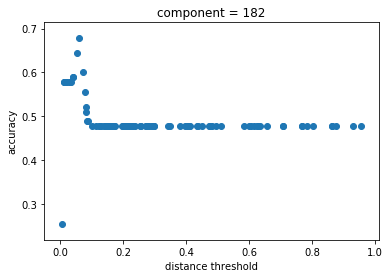

0.06044353854554041 0.6777777777777778


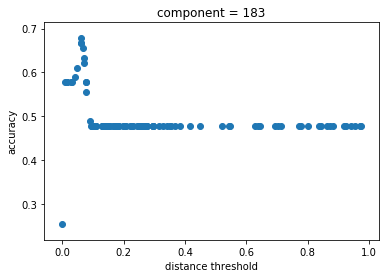

0.06251753439226004 0.7


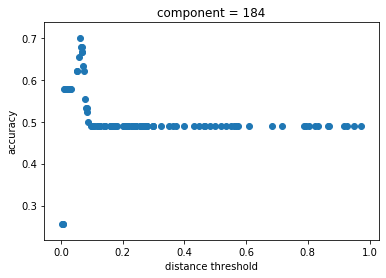

0.06546786680163626 0.6777777777777778


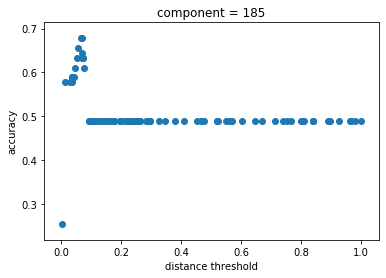

0.06996522052183385 0.7333333333333333


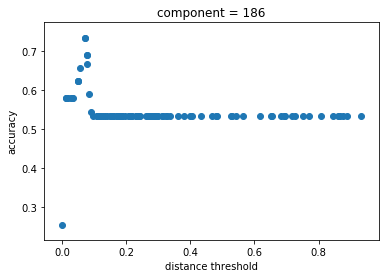

0.005770441413931349 0.25555555555555554


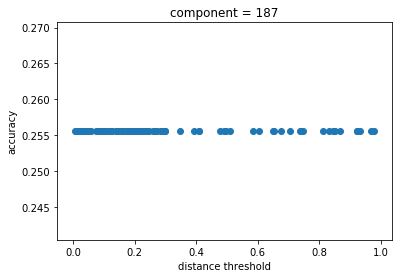

In [210]:
component_acc_tuple = []
for i in range(1, 188):
    pca = PCA(whiten=True, n_components=i)
    x_train_new = pca.fit_transform(x_train)
    x_test_new = pca.transform(x_test)

    ran_arr = np.append(np.random.rand(50), np.random.rand(50) * 0.3)
    
    best_thres = 0
    max_acc = 0

    thres_history = []
    acc_history = []

    for thres in np.sort(ran_arr):
        result = predict(x_train_new, x_test_new, thres)
        accuracy = acc(result, y_test)

        thres_history.append(thres)
        acc_history.append(accuracy)

        if accuracy > max_acc:
            max_acc = accuracy
            best_thres = thres

    print(best_thres, max_acc)
    component_acc_tuple.append((i, max_acc))
    
    plt.title("component = %d"%i)
    plt.ylabel('accuracy')
    plt.xlabel('distance threshold')
    plt.scatter(thres_history, acc_history)
    plt.show()

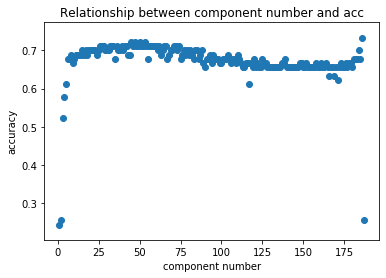

In [211]:
plt.title("Relationship between component number and acc")
plt.ylabel('accuracy')
plt.xlabel('component number')
plt.scatter([i for i, _ in component_acc_tuple], [acc for _, acc in component_acc_tuple])
plt.show()

In [214]:
best_acc = 0
index = 0
for i, acc in component_acc_tuple:
    if acc > best_acc:
        index = i
        best_acc = acc
print(index, best_acc)

186 0.7333333333333333


### Conclusion 1
Currently, we get the best distance threshold = 0.069965. The best accuracy is 0.73333. But the component is 186, which is near 187. So we should choose the component 45, whose accuracy is 0.7222.

In [216]:
import time

In [219]:
start = time.time()
result = predict(x_train_new, x_test_new, thres)
end = time.time()
print("prediction time of close test face, ", end-start)
print('prediction time per face is: ', (end - start)/ len(x_test_new))

prediction time of close test face,  0.0849142074584961
prediction time per face is:  0.0009434911939832899


### apply open test set

In [225]:
pca = PCA(whiten=True, n_components=45)
x_train_new = pca.fit_transform(x_train)
x_test_open_new = pca.transform(x_test_open)

print(x_train_new.shape)
print(x_test_open_new.shape)

(187, 45)
(200, 45)


In [245]:
start_time = time.time()
# thres = 0.1027 # when component is 45
thres = 0.069965 # when component is 186
result = predict(x_train_new, x_test_open_new, thres)
end_time = time.time()

In [246]:
accuracy = np.mean(result==y_test_open)
accuracy

1.0

In [242]:
print("prediction time of open test face is: ", end_time-start_time, "second")
print('prediction time per face is: ', (end_time - start_time)/ len(x_test_open_new), "second")

prediction time of open test face is:  0.20778679847717285 second
prediction time per face is:  0.0010389339923858642 second
